# LSTM's Long Distance Memory

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
!nvidia-smi -L

GPU 0: GeForce RTX 2080 Ti (UUID: GPU-3cb47403-efa9-71ae-1700-c27de6cb0d0a)


In [3]:
def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0


N = 5000
T = 30
D = 1
X = []
y = []
for _ in range(N):
    x = np.random.randn(T)
    X.append(x)
    y.append(get_label(x, 0, 1, 2))
X = np.asarray(X).reshape(-1, T, D)
y = np.asarray(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

Train on 3350 samples, validate on 1650 samples
Epoch 1/100
3350/3350 [==============================] - 3s 805us/sample - loss: 0.6938 - accuracy: 0.5122 - val_loss: 0.6958 - val_accuracy: 0.4800
Epoch 2/100
3350/3350 [==============================] - 0s 116us/sample - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/100
3350/3350 [==============================] - 0s 118us/sample - loss: 0.6930 - accuracy: 0.5137 - val_loss: 0.6960 - val_accuracy: 0.4764
Epoch 4/100
3350/3350 [==============================] - 0s 117us/sample - loss: 0.6939 - accuracy: 0.4952 - val_loss: 0.6918 - val_accuracy: 0.5242
Epoch 5/100
3350/3350 [==============================] - 0s 116us/sample - loss: 0.6928 - accuracy: 0.5066 - val_loss: 0.6932 - val_accuracy: 0.5121
Epoch 6/100
3350/3350 [==============================] - 0s 126us/sample - loss: 0.6916 - accuracy: 0.5218 - val_loss: 0.6914 - val_accuracy: 0.5285
Epoch 7/100
3350/3350 [==============================] - 0

3350/3350 [==============================] - 0s 118us/sample - loss: 0.1715 - accuracy: 0.9501 - val_loss: 0.1955 - val_accuracy: 0.9461
Epoch 56/100
3350/3350 [==============================] - 0s 118us/sample - loss: 0.1747 - accuracy: 0.9475 - val_loss: 0.2143 - val_accuracy: 0.9309
Epoch 57/100
3350/3350 [==============================] - 0s 117us/sample - loss: 0.1604 - accuracy: 0.9564 - val_loss: 0.1780 - val_accuracy: 0.9448
Epoch 58/100
3350/3350 [==============================] - 0s 119us/sample - loss: 0.1537 - accuracy: 0.9543 - val_loss: 0.1735 - val_accuracy: 0.9473
Epoch 59/100
3350/3350 [==============================] - 0s 118us/sample - loss: 0.1493 - accuracy: 0.9564 - val_loss: 0.1701 - val_accuracy: 0.9448
Epoch 60/100
3350/3350 [==============================] - 0s 117us/sample - loss: 0.1322 - accuracy: 0.9606 - val_loss: 0.1574 - val_accuracy: 0.9533
Epoch 61/100
3350/3350 [==============================] - 0s 120us/sample - loss: 0.1365 - accuracy: 0.9579 - val

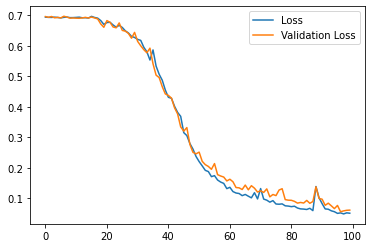

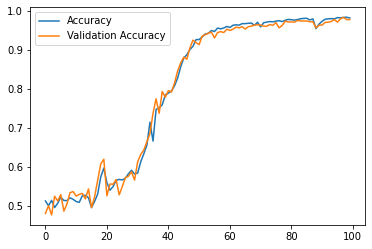

1650/1650 [==============================] - 0s 51us/sample - loss: 0.0618 - accuracy: 0.9782
Accuracy: 0.9781818389892578


In [4]:
i = tf.keras.layers.Input(shape=(T, D))
x = tf.keras.layers.LSTM(5, return_sequences=True)(i)
x = tf.keras.layers.GlobalMaxPool1D()(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.models.Model(i, x)

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

r = model.fit(X_train, y_train,
              validation_data=(X_test, y_test),
              epochs=100)

plt.plot(r.history.get('loss'), label='Loss')
plt.plot(r.history.get('val_loss'), label='Validation Loss')
plt.legend()
plt.show()

plt.plot(r.history.get('accuracy'), label='Accuracy')
plt.plot(r.history.get('val_accuracy'), label='Validation Accuracy')
plt.legend()
plt.show()

print(f'Accuracy: {model.evaluate(X_test, y_test)[1]}')